# HD Integrated Visium Interactive Suite (HiVis) - demo notebook of working with fluorescence image
This Notebook describes how to utilise the HiVis tool for the analysis of VisiumHD experiment with immunofluorescence staining. This tutorial will only go over operations that are related to the fluorescence images.
For a full tutorial with all general operations, plotting, single-cell segmentation follow the [HiVis tutorial](HiVis_tutorial.ipynb).


In [1]:
import os
import sys
sys.path.append(os.path.abspath(".."))
import matplotlib.pyplot as plt

from HiVis import HiVis

## Import the data
The data in this tutorial is of human tonsil, available from [10X datasets](https://www.10xgenomics.com/datasets/visium-hd-cytassist-gene-expression-human-tonsil-fresh-frozen-if), if you wish to follow along, download the following files:
* [Microscope image](https://cf.10xgenomics.com/samples/spatial-exp/3.1.1/Visium_HD_Human_Tonsil_Fresh_Frozen_IF/Visium_HD_Human_Tonsil_Fresh_Frozen_IF_tissue_image.tif) (5.5 GB)
* [Binned outputs](https://cf.10xgenomics.com/samples/spatial-exp/3.1.1/Visium_HD_Human_Tonsil_Fresh_Frozen_IF/Visium_HD_Human_Tonsil_Fresh_Frozen_IF_binned_outputs.tar.gz) (12 GB, but only square_002um are needed). Extract the .gz and .tar files.

The creation of new HiVis object is similar to H&E data, but it also requires a "fluorescence" parameter, which specifies the staining names, and the colors you want to display them in spatial plots.

The initial creation takes few minuts, since the cropped image is saved (for use in Qupath), and the fluorescence intensity for each spot is quanified.

[Loading images]
[Loading metadata]
[Loading data]


Normilizing channels: 100%|██████████████████████████████████████████████████████████████| 3/3 [00:27<00:00,  9.23s/it]


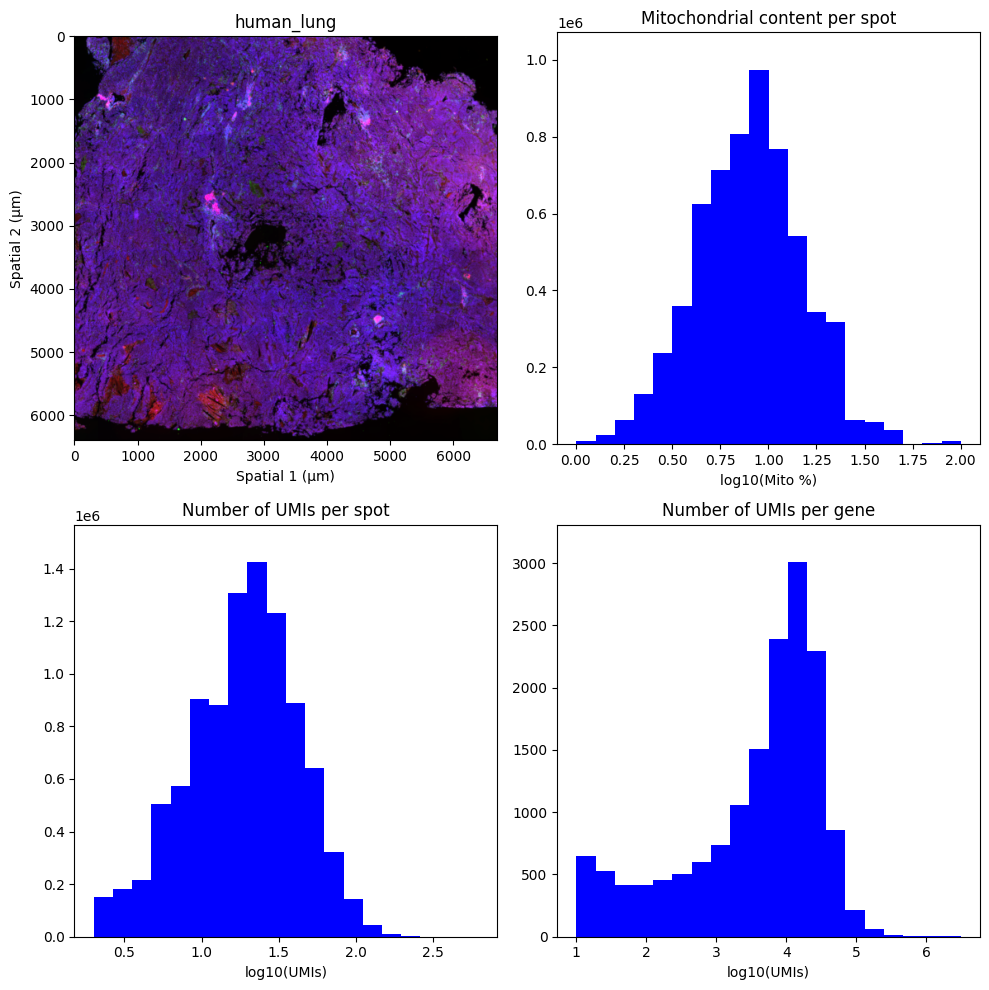

In [2]:
path_image_fullres = r"outs_lung\Visium_HD_Human_Lung_Cancer_tissue_image.tif"
path_input_data = r"outs_lung\binned_outputs\square_002um"
path_output = r"output"
properties = {"organism":"human",
              "organ":"lung",
              "source":"10X"}
fluorescence = {"CD45":"green", "CD20":"red", "DAPI":"blue"} # color can also be None, then it won't show in the spatial plots
lung = HiVis.new(path_image_fullres, 
               path_input_data, 
               path_output,
               name="human_lung",  
               fluorescence=fluorescence,
               properties=properties)

The intensity measurements for each channel are in HiVis.adata.obs, and can be acessed like every obs

In [13]:
print("CD45: ",lung["CD45"])
lung.adata.obs["DAPI"].head()

CD45:  [42087. 79234. 41088. ... 40406. 61394. 62469.]


s_002um_02058_00301-1    270342.0
s_002um_00700_02130-1    262868.0
s_002um_02043_00141-1    177434.0
s_002um_02278_00850-1    178607.0
s_002um_00639_00600-1    178299.0
Name: DAPI, dtype: float64

The colors we specified are only applicable to to fullres image (highres and lowres are flattened).

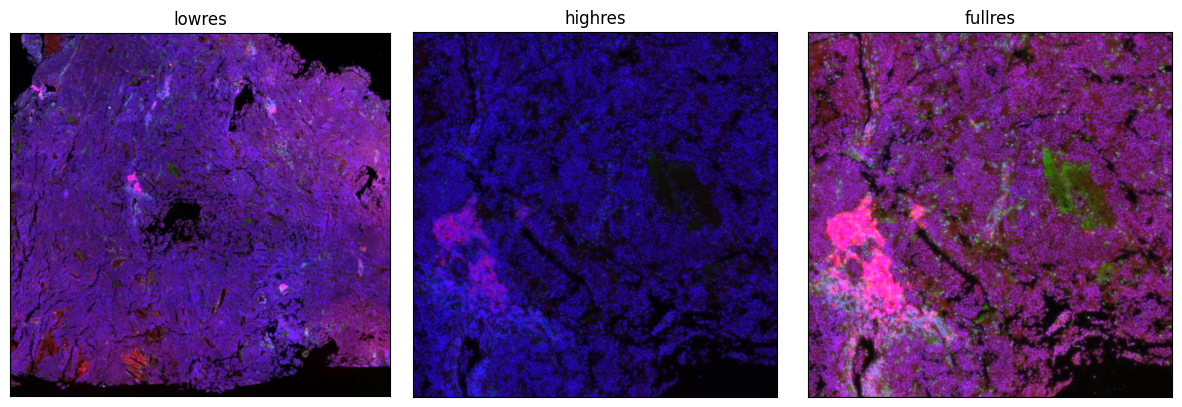

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
lung.plot.spatial(img_resolution="low", title="lowres",ax=axes[0],axis_labels=False)
lung.plot.spatial(xlim=[2000,3200],ylim=[1900,3100], img_resolution="high", title="highres",ax=axes[1],axis_labels=False)
lung.plot.spatial(xlim=[2000,3200],ylim=[1900,3100], img_resolution="full", title="fullres",ax=axes[2],axis_labels=False)
plt.tight_layout()

## Changing colors and color-normalization method
We can change the colors without creating a new HiVis object every time.

Lets first crop our object so the color changes will be more visible.

In [4]:
mask = (lung["um_x"] > 2000) & (lung["um_x"] < 3200) & (lung["um_y"] > 1900) & (lung["um_y"] < 3100)
lung_subset = lung[mask,:]
lung_subset

Normilizing channels: 100%|██████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.15it/s]


# human_lung_subset #
	Organism: human
	Size: 346111 x 15702

obs: in_tissue, array_row, array_col, pxl_row_in_fullres, pxl_col_in_fullres, CD45, CD20, DAPI, nUMI, mito_sum, nUMI_log10, mito_percent_log10, pxl_col_in_lowres, pxl_row_in_lowres, pxl_col_in_highres, pxl_row_in_highres, um_x, um_y

var: gene_ids, feature_types, genome, nUMI_gene, nUMI_gene_log10

Normilizing channels: 100%|██████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.72it/s]


<Axes: >

<Figure size 640x480 with 0 Axes>

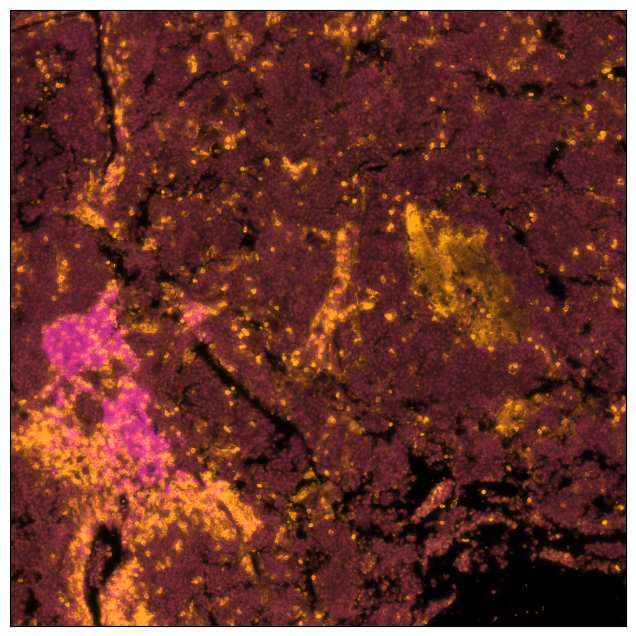

In [5]:
fluorescence = {"CD45":"orange", "CD20":"purple", "DAPI":None} 
lung_subset.recolor(fluorescence)
lung_subset.plot.spatial(axis_labels=False,img_resolution="full")

Lets see all normalization methods

Normilizing channels: 100%|██████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  6.90it/s]


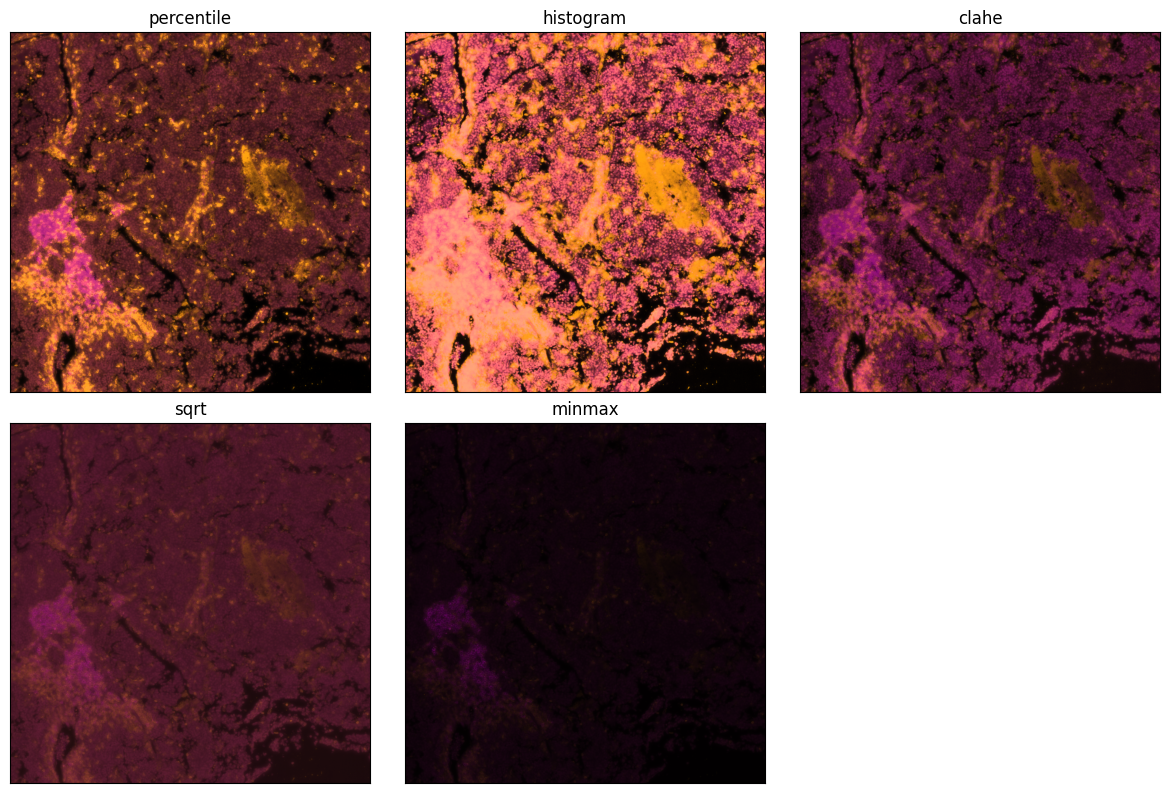

In [6]:
methods = ["percentile", "histogram","clahe","sqrt", None]
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, method in enumerate(methods):
    lung_subset.recolor(normalization_method=method)
    title = method if method else "minmax"
    lung_subset.plot.spatial(axis_labels=False,img_resolution="full",title=title,ax=axes[i])

axes[5].set_visible(False)
plt.tight_layout()

Similar to H&E, we can plot spatial, and after single-cell aggregation - we can plot the cells with the bounderies.

Normilizing channels: 100%|██████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.86it/s]


<Axes: title={'center': 'Igha1'}, xlabel='Spatial 1 (µm)', ylabel='Spatial 2 (µm)'>

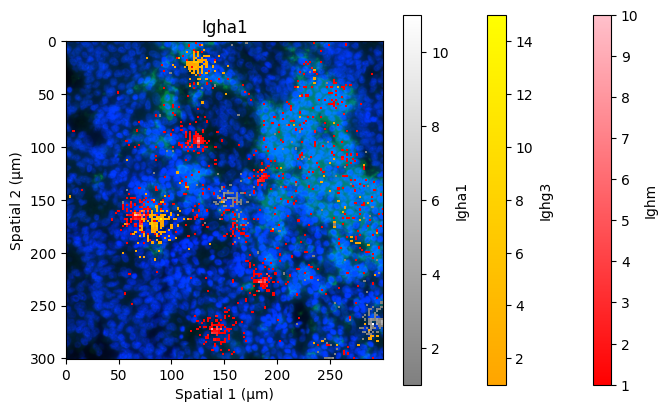

In [7]:
fluorescence = {"CD45":None, "CD20":"green", "DAPI":"blue"} 
lung_subset.recolor(fluorescence, normalization_method="percentile")
ax = lung_subset.plot.spatial("Ighm",cmap=["red","pink"],exact=True,xlim=[0,300],ylim=[700,1000])
ax = lung_subset.plot.spatial("Ighg3",cmap=["orange","yellow"],exact=True,ax=ax,xlim=[0,300],ylim=[700,1000])
lung_subset.plot.spatial("Igha1",cmap=["gray","white"],exact=True,ax=ax,xlim=[0,300],ylim=[700,1000])